In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from scipy import stats
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

In [435]:
train=pd.read_csv('train.csv')
original_train=train.copy()
train.head()

,Loan.ID,Current.Loan.Amount,Term,Credit.Score,Years.in.current.job,Home.Ownership,Annual.Income,Purpose,Monthly.Debt,Years.of.Credit.History,Months.since.last.delinquent,Number.of.Open.Accounts,Number.of.Credit.Problems,Current.Credit.Balance,Maximum.Open.Credit,Bankruptcies,Tax.Liens,Loan.Status
0,0,17879,Short Term,739.0,6 years,Home Mortgage,95357.0,Debt Consolidation,1509.82,34.4,5.0,26,0,23986,40313,0.0,0.0,1
1,1,99999999,Long Term,619.0,6 years,Rent,54406.0,Debt Consolidation,1065.45,12.7,NaN,8,0,22938,31250,0.0,0.0,1
2,3,99999999,Short Term,738.0,less than 1 year,Rent,40480.0,Medical Bills,573.47,32.7,60.0,9,1,3963,5669,1.0,0.0,1
3,4,11200,Short Term,738.0,4 years,Rent,53965.0,Debt Consolidation,1358.11,15.8,NaN,8,1,11782,25951,1.0,0.0,1
4,5,3608,Short Term,731.0,10+ years,Home Mortgage,47709.0,Home Improvements,339.93,16.1,47.0,6,0,22909,25568,0.0,0.0,1


In [0]:
from sklearn.impute import KNNImputer

In [0]:
imputer = KNNImputer(n_neighbors=2)

In [0]:
x=np.array(train['Credit.Score'])

In [0]:
train['Credit.Score'] = imputer.fit_transform(x.reshape(-1, 1))

In [426]:
train.head()

,Loan.ID,Current.Loan.Amount,Term,Credit.Score,Years.in.current.job,Home.Ownership,Annual.Income,Purpose,Monthly.Debt,Years.of.Credit.History,Months.since.last.delinquent,Number.of.Open.Accounts,Number.of.Credit.Problems,Current.Credit.Balance,Maximum.Open.Credit,Bankruptcies,Tax.Liens,Loan.Status
0,0,17879,Short Term,739.0,6 years,Home Mortgage,95357.0,Debt Consolidation,1509.82,34.4,5.0,26,0,23986,40313,0.0,0.0,1
1,1,99999999,Long Term,619.0,6 years,Rent,54406.0,Debt Consolidation,1065.45,12.7,NaN,8,0,22938,31250,0.0,0.0,1
2,3,99999999,Short Term,738.0,less than 1 year,Rent,40480.0,Medical Bills,573.47,32.7,60.0,9,1,3963,5669,1.0,0.0,1
3,4,11200,Short Term,738.0,4 years,Rent,53965.0,Debt Consolidation,1358.11,15.8,NaN,8,1,11782,25951,1.0,0.0,1
4,5,3608,Short Term,731.0,10+ years,Home Mortgage,47709.0,Home Improvements,339.93,16.1,47.0,6,0,22909,25568,0.0,0.0,1


In [427]:
train.isnull().sum()

Loan.ID                             0
Current.Loan.Amount                 0
Term                                0
Credit.Score                        0
Years.in.current.job             2529
Home.Ownership                      0
Annual.Income                   12229
Purpose                             0
Monthly.Debt                        0
Years.of.Credit.History             0
Months.since.last.delinquent    32475
Number.of.Open.Accounts             0
Number.of.Credit.Problems           0
Current.Credit.Balance              0
Maximum.Open.Credit                 0
Bankruptcies                      127
Tax.Liens                           2
Loan.Status                         0
dtype: int64

In [436]:
test=pd.read_csv('test.csv')
original_test=test.copy()
test.head()

,Loan.ID,Current.Loan.Amount,Term,Credit.Score,Years.in.current.job,Home.Ownership,Annual.Income,Purpose,Monthly.Debt,Years.of.Credit.History,Months.since.last.delinquent,Number.of.Open.Accounts,Number.of.Credit.Problems,Current.Credit.Balance,Maximum.Open.Credit,Bankruptcies,Tax.Liens,Loan.Status
0,2,6966,Short Term,673.0,1 year,Home Mortgage,54736.0,Home Improvements,839.28,16.4,8.0,6,0,2942,3881,0.0,0.0,NaN
1,6,9848,Short Term,NaN,6 years,Rent,NaN,Debt Consolidation,605.65,18.8,NaN,6,0,6957,8568,0.0,0.0,NaN
2,9,99999999,Short Term,724.0,3 years,Rent,27462.0,Debt Consolidation,338.69,10.8,NaN,10,0,11773,15369,0.0,0.0,NaN
3,12,6737,Short Term,NaN,3 years,Rent,NaN,Debt Consolidation,506.38,5.7,NaN,9,0,5841,10856,0.0,0.0,NaN
4,14,5878,Short Term,743.0,less than 1 year,Home Mortgage,107767.0,Home Improvements,1420.73,24.6,5.0,14,0,35963,89459,0.0,0.0,NaN


In [437]:
train.isnull().sum()

Loan.ID                             0
Current.Loan.Amount                 0
Term                                0
Credit.Score                    12229
Years.in.current.job             2529
Home.Ownership                      0
Annual.Income                   12229
Purpose                             0
Monthly.Debt                        0
Years.of.Credit.History             0
Months.since.last.delinquent    32475
Number.of.Open.Accounts             0
Number.of.Credit.Problems           0
Current.Credit.Balance              0
Maximum.Open.Credit                 0
Bankruptcies                      127
Tax.Liens                           2
Loan.Status                         0
dtype: int64

In [438]:
test.isnull().sum()

Loan.ID                             0
Current.Loan.Amount                 0
Term                                0
Credit.Score                     4801
Years.in.current.job             1016
Home.Ownership                      0
Annual.Income                    4801
Purpose                             0
Monthly.Debt                        0
Years.of.Credit.History             0
Months.since.last.delinquent    12528
Number.of.Open.Accounts             0
Number.of.Credit.Problems           0
Current.Credit.Balance              0
Maximum.Open.Credit                 0
Bankruptcies                       54
Tax.Liens                           8
Loan.Status                     23386
dtype: int64

In [364]:
train.describe()

,Loan.ID,Current.Loan.Amount,Credit.Score,Annual.Income,Monthly.Debt,Years.of.Credit.History,Months.since.last.delinquent,Number.of.Open.Accounts,Number.of.Credit.Problems,Current.Credit.Balance,Maximum.Open.Credit,Bankruptcies,Tax.Liens,Loan.Status
count,60804.000000,6.080400e+04,48575.000000,4.857500e+04,60804.00000,60804.000000,28329.000000,60804.000000,60804.000000,60804.000000,6.080400e+04,60677.000000,60802.00000,60804.000000
mean,42094.538451,1.217772e+07,1104.772331,7.252253e+04,967.75930,18.235654,34.859402,11.113397,0.165861,15430.033863,3.316369e+04,0.115645,0.02870,0.759457
std,24303.803897,3.268413e+07,1526.402013,6.246093e+04,631.18808,7.030016,21.976407,4.993859,0.479679,18906.126169,2.155779e+05,0.346800,0.25697,0.427417
min,0.000000,4.910000e+02,585.000000,4.268000e+03,0.00000,3.600000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000,0.000000
25%,21046.750000,8.167750e+03,707.000000,4.470300e+04,536.78750,13.500000,16.000000,8.000000,0.000000,5907.750000,1.252175e+04,0.000000,0.00000,1.000000
50%,42094.500000,1.424000e+04,726.000000,6.157600e+04,851.81000,17.000000,32.000000,10.000000,0.000000,10995.000000,2.130700e+04,0.000000,0.00000,1.000000
75%,63142.250000,2.402325e+04,741.000000,8.681950e+04,1259.65250,21.700000,51.000000,14.000000,0.000000,19321.000000,3.574025e+04,0.000000,0.00000,1.000000
max,84189.000000,1.000000e+08,7510.000000,8.713547e+06,9060.85000,60.500000,176.000000,76.000000,15.000000,854602.000000,3.628434e+07,6.000000,15.00000,1.000000


In [365]:
train.shape

(60804, 18)

In [0]:
train=train.replace(to_replace =99999999, 
                 value =np.nan) 

In [440]:
train.isnull().sum()

Loan.ID                             0
Current.Loan.Amount              7397
Term                                0
Credit.Score                    12229
Years.in.current.job             2529
Home.Ownership                      0
Annual.Income                   12229
Purpose                             0
Monthly.Debt                        0
Years.of.Credit.History             0
Months.since.last.delinquent    32475
Number.of.Open.Accounts             0
Number.of.Credit.Problems           0
Current.Credit.Balance              0
Maximum.Open.Credit                 0
Bankruptcies                      127
Tax.Liens                           2
Loan.Status                         0
dtype: int64

In [0]:
test=test.replace(to_replace =99999999, 
                 value =np.nan)

In [276]:
print(train['Current.Loan.Amount'].skew())

0.8147346334633766


In [277]:
print(test['Current.Loan.Amount'].skew())

0.8311247283637478


In [278]:
train['Credit.Score'].shape

(60804,)

In [0]:
for i in train['Credit.Score']:
  if i>1000:
    train['Credit.Score']=train['Credit.Score'].replace(to_replace =i, 
                 value =i/10) 

In [0]:
for i in test['Credit.Score']:
  if i>1000:
    test['Credit.Score']=test['Credit.Score'].replace(to_replace =i, 
                 value =i/10) 

In [281]:
train.describe()

,Loan.ID,Current.Loan.Amount,Credit.Score,Annual.Income,Monthly.Debt,Years.of.Credit.History,Months.since.last.delinquent,Number.of.Open.Accounts,Number.of.Credit.Problems,Current.Credit.Balance,Maximum.Open.Credit,Bankruptcies,Tax.Liens,Loan.Status
count,60804.000000,60804.000000,48575.000000,4.857500e+04,60804.00000,60804.000000,28329.000000,60804.000000,60804.000000,60804.000000,6.080400e+04,60677.000000,60802.00000,60804.000000
mean,42094.538451,14123.776824,717.390283,7.252253e+04,967.75930,18.235654,34.859402,11.113397,0.165861,15430.033863,3.316369e+04,0.115645,0.02870,0.759457
std,24303.803897,7890.276886,28.112980,6.246093e+04,631.18808,7.030016,21.976407,4.993859,0.479679,18906.126169,2.155779e+05,0.346800,0.25697,0.427417
min,0.000000,491.000000,585.000000,4.268000e+03,0.00000,3.600000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000,0.000000
25%,21046.750000,8167.750000,704.000000,4.470300e+04,536.78750,13.500000,16.000000,8.000000,0.000000,5907.750000,1.252175e+04,0.000000,0.00000,1.000000
50%,42094.500000,14124.000000,724.000000,6.157600e+04,851.81000,17.000000,32.000000,10.000000,0.000000,10995.000000,2.130700e+04,0.000000,0.00000,1.000000
75%,63142.250000,18176.000000,739.000000,8.681950e+04,1259.65250,21.700000,51.000000,14.000000,0.000000,19321.000000,3.574025e+04,0.000000,0.00000,1.000000
max,84189.000000,35875.000000,751.000000,8.713547e+06,9060.85000,60.500000,176.000000,76.000000,15.000000,854602.000000,3.628434e+07,6.000000,15.00000,1.000000


In [0]:
train['Credit.Score'].fillna(train['Credit.Score'].mean(), inplace=True)
train['Annual.Income'].fillna(train['Annual.Income'].median(), inplace=True)
test['Credit.Score'].fillna(test['Credit.Score'].mean(), inplace=True)
test['Annual.Income'].fillna(test['Annual.Income'].median(), inplace=True)

In [0]:
train['Balance']=(train['Annual.Income']/12)-train['Monthly.Debt']
test['Balance']=(test['Annual.Income']/12)-test['Monthly.Debt']

In [284]:
print(np.log(train['Balance'].skew()))

4.291430456227323


In [285]:
print(np.log(np.log(train['Balance'].skew())))

1.4566201170412985


In [286]:
np.log(np.log(train['Balance']))

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0        2.171309
1        2.098195
2        2.071576
3        2.085877
4        2.103962
           ...   
60799    2.122922
60800    2.177768
60801    2.141496
60802    2.015178
60803    2.052943
Name: Balance, Length: 60804, dtype: float64

In [287]:
train['Balance']=np.log(np.log(train['Balance']))
train['Balance']=np.log(np.log(train['Balance']))

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [288]:
print(train['Credit.Score'].skew())

-1.5342546524773848


In [289]:
print(np.log(train['Annual.Income']).skew())

0.20770355234607277


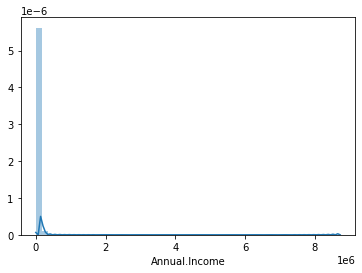

In [290]:
sns.distplot(train['Annual.Income'])

In [0]:
train['Debt/Income']=train['Monthly.Debt']/(train['Annual.Income']/12)
test['Debt/Income']=test['Monthly.Debt']/(test['Annual.Income']/12)

In [0]:
train['Annual.Income']=np.log(train['Annual.Income'])

In [0]:
test['Annual.Income']=np.log(test['Annual.Income'])

In [294]:
print(train['Debt/Income'].skew())

0.9938903897647264


In [295]:
print(np.log(train['Years.of.Credit.History']).skew())

-0.16089856087440077


In [0]:
train['Years.of.Credit.History']=np.log(train['Years.of.Credit.History'])

In [0]:
test['Years.of.Credit.History']=np.log(test['Years.of.Credit.History'])

In [298]:
print(train['Number.of.Open.Accounts'].skew())

1.215354748588503


In [0]:
for i in train['Number.of.Open.Accounts']:
  if i==0:
    train['Number.of.Open.Accounts']=train['Number.of.Open.Accounts'].replace(to_replace =i, 
                 value =1) 


In [0]:
for i in test['Number.of.Open.Accounts']:
  if i==0:
    test['Number.of.Open.Accounts']=test['Number.of.Open.Accounts'].replace(to_replace =i, 
                 value =1) 

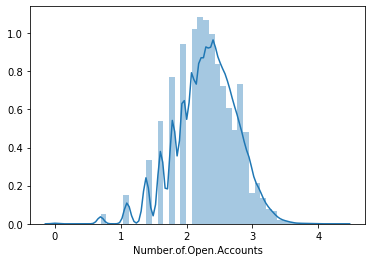

In [301]:
sns.distplot(np.log(train['Number.of.Open.Accounts']))

In [302]:
print(np.log(train['Number.of.Open.Accounts']).skew())

-0.3779381503178012


In [0]:

train['Number.of.Open.Accounts']=np.log(train['Number.of.Open.Accounts'])

In [0]:

test['Number.of.Open.Accounts']=np.log(test['Number.of.Open.Accounts'])

In [305]:
print(train['Number.of.Credit.Problems'].skew())

4.941149581335663


In [0]:
for i in train['Number.of.Credit.Problems']:
  if i==0:
    train['Number.of.Credit.Problems']=train['Number.of.Credit.Problems'].replace(to_replace =i, 
                 value =1) 


In [0]:
for i in test['Number.of.Credit.Problems']:
  if i==0:
    test['Number.of.Credit.Problems']=test['Number.of.Credit.Problems'].replace(to_replace =i, 
                 value =1) 

In [308]:
print(np.log(train['Number.of.Credit.Problems']).skew())

8.657767473105135


In [309]:
print(train['Current.Credit.Balance'].skew())

9.554189576441217


In [0]:
for i in train['Current.Credit.Balance']:
  if i==0:
    train['Current.Credit.Balance']=train['Current.Credit.Balance'].replace(to_replace =i, 
                 value =1) 

In [0]:
for i in test['Current.Credit.Balance']:
  if i==0:
    test['Current.Credit.Balance']=test['Current.Credit.Balance'].replace(to_replace =i, 
                 value =1) 

In [0]:
for i in train['Maximum.Open.Credit']:
  if i==0:
    train['Maximum.Open.Credit']=train['Maximum.Open.Credit'].replace(to_replace =i, 
                 value =1) 

In [0]:
for i in test['Maximum.Open.Credit']:
  if i==0:
    test['Maximum.Open.Credit']=test['Maximum.Open.Credit'].replace(to_replace =i, 
                 value =1) 

In [0]:
train['Current.Credit.Balance/Maximum.Open.Credit']=train['Current.Credit.Balance']/train['Maximum.Open.Credit']
test['Current.Credit.Balance/Maximum.Open.Credit']=test['Current.Credit.Balance']/test['Maximum.Open.Credit']

In [315]:
print(np.log(train['Current.Credit.Balance']).skew())

-2.918548331110231


In [0]:
train['Current.Credit.Balance']=np.log(train['Current.Credit.Balance'])

In [0]:
test['Current.Credit.Balance']=np.log(test['Current.Credit.Balance'])

In [318]:
print(train['Maximum.Open.Credit'].skew())

111.70394743730462


In [319]:
print(np.log(train['Maximum.Open.Credit']).skew())

-3.9897485140631876


In [0]:
train['Maximum.Open.Credit']=np.log(train['Maximum.Open.Credit'])

In [0]:
test['Maximum.Open.Credit']=np.log(test['Maximum.Open.Credit'])

In [322]:
print(np.log(train['Current.Credit.Balance/Maximum.Open.Credit']).skew())

0.16000481440615003


In [0]:
train['Current.Credit.Balance/Maximum.Open.Credit']=np.log(train['Current.Credit.Balance/Maximum.Open.Credit'])
test['Current.Credit.Balance/Maximum.Open.Credit']=np.log(test['Current.Credit.Balance/Maximum.Open.Credit'])

In [324]:
train.isnull().sum()

Loan.ID                                           0
Current.Loan.Amount                               0
Term                                              0
Credit.Score                                      0
Years.in.current.job                           2529
Home.Ownership                                    0
Annual.Income                                     0
Purpose                                           0
Monthly.Debt                                      0
Years.of.Credit.History                           0
Months.since.last.delinquent                  32475
Number.of.Open.Accounts                           0
Number.of.Credit.Problems                         0
Current.Credit.Balance                            0
Maximum.Open.Credit                               0
Bankruptcies                                    127
Tax.Liens                                         2
Loan.Status                                       0
Balance                                           8
Debt/Income 

In [0]:
train['Years.in.current.job'].fillna(train['Years.in.current.job'].mode()[0], inplace=True)
train['Balance'].fillna(train['Balance'].mode()[0], inplace=True)
train['Bankruptcies'].fillna(train['Bankruptcies'].mode()[0], inplace=True)
train['Months.since.last.delinquent'].fillna(train['Months.since.last.delinquent'].median(), inplace=True)
train['Tax.Liens'].fillna(train['Tax.Liens'].mode()[0], inplace=True)
test['Balance'].fillna(test['Balance'].mode()[0], inplace=True)
test['Years.in.current.job'].fillna(test['Years.in.current.job'].mode()[0], inplace=True)
test['Bankruptcies'].fillna(test['Bankruptcies'].mode()[0], inplace=True)
test['Tax.Liens'].fillna(test['Tax.Liens'].mode()[0], inplace=True)
test['Months.since.last.delinquent'].fillna(test['Months.since.last.delinquent'].median(), inplace=True)

In [381]:
train.isnull().sum()

Loan.ID                                       0
Current.Loan.Amount                           0
Term                                          0
Credit.Score                                  0
Years.in.current.job                          0
Home.Ownership                                0
Annual.Income                                 0
Purpose                                       0
Monthly.Debt                                  0
Years.of.Credit.History                       0
Months.since.last.delinquent                  0
Number.of.Open.Accounts                       0
Number.of.Credit.Problems                     0
Current.Credit.Balance                        0
Maximum.Open.Credit                           0
Bankruptcies                                  0
Tax.Liens                                     0
Loan.Status                                   0
Balance                                       0
Debt/Income                                   0
Current.Credit.Balance/Maximum.Open.Cred

In [327]:
print(train['Monthly.Debt'].skew())

1.7498236616663974


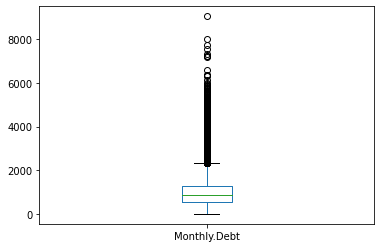

In [328]:
train['Monthly.Debt'].plot.box()

In [329]:
train.isnull().sum()

Loan.ID                                       0
Current.Loan.Amount                           0
Term                                          0
Credit.Score                                  0
Years.in.current.job                          0
Home.Ownership                                0
Annual.Income                                 0
Purpose                                       0
Monthly.Debt                                  0
Years.of.Credit.History                       0
Months.since.last.delinquent                  0
Number.of.Open.Accounts                       0
Number.of.Credit.Problems                     0
Current.Credit.Balance                        0
Maximum.Open.Credit                           0
Bankruptcies                                  0
Tax.Liens                                     0
Loan.Status                                   0
Balance                                       0
Debt/Income                                   0
Current.Credit.Balance/Maximum.Open.Cred

In [330]:
test.isnull().sum()

Loan.ID                                           0
Current.Loan.Amount                               0
Term                                              0
Credit.Score                                      0
Years.in.current.job                              0
Home.Ownership                                    0
Annual.Income                                     0
Purpose                                           0
Monthly.Debt                                      0
Years.of.Credit.History                           0
Months.since.last.delinquent                      0
Number.of.Open.Accounts                           0
Number.of.Credit.Problems                         0
Current.Credit.Balance                            0
Maximum.Open.Credit                               0
Bankruptcies                                      0
Tax.Liens                                         0
Loan.Status                                   23386
Balance                                           0
Debt/Income 

In [0]:
train=train.drop('Loan.ID',axis=1) 


In [0]:
test=test.drop('Loan.ID',axis=1) 

test=test.drop('Loan.Status',1)

In [385]:
test.head()

,Current.Loan.Amount,Term,Credit.Score,Years.in.current.job,Home.Ownership,Annual.Income,Purpose,Monthly.Debt,Years.of.Credit.History,Months.since.last.delinquent,Number.of.Open.Accounts,Number.of.Credit.Problems,Current.Credit.Balance,Maximum.Open.Credit,Bankruptcies,Tax.Liens,Balance,Debt/Income,Current.Credit.Balance/Maximum.Open.Credit
0,6966,Short Term,673.000000,1 year,Home Mortgage,54736.0,Home Improvements,839.28,16.4,8.0,6,0,2942,3881,0.0,0.0,3722.053333,0.183999,0.758052
1,9848,Short Term,717.180253,6 years,Rent,61750.0,Debt Consolidation,605.65,18.8,32.0,6,0,6957,8568,0.0,0.0,4540.183333,0.117697,0.811975
2,14124,Short Term,724.000000,3 years,Rent,27462.0,Debt Consolidation,338.69,10.8,32.0,10,0,11773,15369,0.0,0.0,1949.810000,0.147997,0.766023
3,6737,Short Term,717.180253,3 years,Rent,61750.0,Debt Consolidation,506.38,5.7,32.0,9,0,5841,10856,0.0,0.0,4639.453333,0.098406,0.538043
4,5878,Short Term,743.000000,less than 1 year,Home Mortgage,107767.0,Home Improvements,1420.73,24.6,5.0,14,0,35963,89459,0.0,0.0,7559.853333,0.158200,0.402005


In [0]:
test=pd.get_dummies(test)

In [387]:
test.head()

,Current.Loan.Amount,Credit.Score,Annual.Income,Monthly.Debt,Years.of.Credit.History,Months.since.last.delinquent,Number.of.Open.Accounts,Number.of.Credit.Problems,Current.Credit.Balance,Maximum.Open.Credit,Bankruptcies,Tax.Liens,Balance,Debt/Income,Current.Credit.Balance/Maximum.Open.Credit,Term_Long Term,Term_Short Term,Years.in.current.job_1 year,Years.in.current.job_10+ years,Years.in.current.job_2 years,Years.in.current.job_3 years,Years.in.current.job_4 years,Years.in.current.job_5 years,Years.in.current.job_6 years,Years.in.current.job_7 years,Years.in.current.job_8 years,Years.in.current.job_9 years,Years.in.current.job_less than 1 year,Home.Ownership_HaveMortgage,Home.Ownership_Home Mortgage,Home.Ownership_Own Home,Home.Ownership_Rent,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,6966,673.000000,54736.0,839.28,16.4,8.0,6,0,2942,3881,0.0,0.0,3722.053333,0.183999,0.758052,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,9848,717.180253,61750.0,605.65,18.8,32.0,6,0,6957,8568,0.0,0.0,4540.183333,0.117697,0.811975,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,14124,724.000000,27462.0,338.69,10.8,32.0,10,0,11773,15369,0.0,0.0,1949.810000,0.147997,0.766023,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,6737,717.180253,61750.0,506.38,5.7,32.0,9,0,5841,10856,0.0,0.0,4639.453333,0.098406,0.538043,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,5878,743.000000,107767.0,1420.73,24.6,5.0,14,0,35963,89459,0.0,0.0,7559.853333,0.158200,0.402005,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [335]:
train.head()

,Current.Loan.Amount,Term,Credit.Score,Years.in.current.job,Home.Ownership,Annual.Income,Purpose,Monthly.Debt,Years.of.Credit.History,Months.since.last.delinquent,Number.of.Open.Accounts,Number.of.Credit.Problems,Current.Credit.Balance,Maximum.Open.Credit,Bankruptcies,Tax.Liens,Loan.Status,Balance,Debt/Income,Current.Credit.Balance/Maximum.Open.Credit
0,17879,Short Term,739.0,6 years,Home Mortgage,11.465383,Debt Consolidation,1509.82,3.538057,5.0,3.258097,1,10.085226,10.604429,0.0,0.0,1,-0.254466,0.190000,-0.519204
1,14124,Long Term,619.0,6 years,Rent,10.904230,Debt Consolidation,1065.45,2.541602,32.0,2.079442,1,10.040550,10.349775,0.0,0.0,1,-0.299650,0.235000,-0.309224
2,14124,Short Term,738.0,less than 1 year,Rent,10.608563,Medical Bills,573.47,3.487375,60.0,2.197225,1,8.284757,8.642768,1.0,0.0,1,-0.317029,0.170001,-0.358011
3,11200,Short Term,738.0,4 years,Rent,10.896091,Debt Consolidation,1358.11,2.760010,32.0,2.079442,1,9.374328,10.163965,1.0,0.0,1,-0.307627,0.301998,-0.789637
4,3608,Short Term,731.0,10+ years,Home Mortgage,10.772875,Home Improvements,339.93,2.778819,47.0,1.791759,1,10.039285,10.149097,0.0,0.0,1,-0.295953,0.085501,-0.109812


In [0]:
X = train.drop('Loan.Status',1) 
y = train['Loan.Status']

In [0]:
X=pd.get_dummies(X) 
train=pd.get_dummies(train) 

In [406]:
X.shape

(60804, 48)

In [390]:
X.head()

,Current.Loan.Amount,Credit.Score,Annual.Income,Monthly.Debt,Years.of.Credit.History,Months.since.last.delinquent,Number.of.Open.Accounts,Number.of.Credit.Problems,Current.Credit.Balance,Maximum.Open.Credit,Bankruptcies,Tax.Liens,Balance,Debt/Income,Current.Credit.Balance/Maximum.Open.Credit,Term_Long Term,Term_Short Term,Years.in.current.job_1 year,Years.in.current.job_10+ years,Years.in.current.job_2 years,Years.in.current.job_3 years,Years.in.current.job_4 years,Years.in.current.job_5 years,Years.in.current.job_6 years,Years.in.current.job_7 years,Years.in.current.job_8 years,Years.in.current.job_9 years,Years.in.current.job_less than 1 year,Home.Ownership_HaveMortgage,Home.Ownership_Home Mortgage,Home.Ownership_Own Home,Home.Ownership_Rent,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,17879,739.0,95357.0,1509.82,34.4,5.0,26,0,23986,40313,0.0,0.0,6436.596667,0.190000,0.594994,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,14124,619.0,54406.0,1065.45,12.7,32.0,8,0,22938,31250,0.0,0.0,3468.383333,0.235000,0.734016,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,14124,738.0,40480.0,573.47,32.7,60.0,9,1,3963,5669,1.0,0.0,2799.863333,0.170001,0.699065,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,11200,738.0,53965.0,1358.11,15.8,32.0,8,1,11782,25951,1.0,0.0,3138.973333,0.301998,0.454009,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,3608,731.0,47709.0,339.93,16.1,47.0,6,0,22909,25568,0.0,0.0,3635.820000,0.085501,0.896003,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [0]:
scaler = preprocessing.StandardScaler().fit(X)

In [0]:
X=scaler.transform(X)

In [0]:
test=scaler.transform(test)

In [398]:
X.shape

(60804, 48)

In [338]:
train.isnull().sum()

Current.Loan.Amount                           0
Credit.Score                                  0
Annual.Income                                 0
Monthly.Debt                                  0
Years.of.Credit.History                       0
Months.since.last.delinquent                  0
Number.of.Open.Accounts                       0
Number.of.Credit.Problems                     0
Current.Credit.Balance                        0
Maximum.Open.Credit                           0
Bankruptcies                                  0
Tax.Liens                                     0
Loan.Status                                   0
Balance                                       0
Debt/Income                                   0
Current.Credit.Balance/Maximum.Open.Credit    0
Term_Long Term                                0
Term_Short Term                               0
Years.in.current.job_1 year                   0
Years.in.current.job_10+ years                0
Years.in.current.job_2 years            

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [410]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
model = LogisticRegression() 
model.fit(x_train, y_train)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [0]:
pred_cv = model.predict(x_cv)

In [412]:
accuracy_score(y_cv,pred_cv)

0.7586887402697072

In [0]:
from sklearn.model_selection import StratifiedKFold

In [414]:
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
   xtr,xvl = X.loc[train_index],X.loc[test_index]
   ytr,yvl = y[train_index],y[test_index]
   model = LogisticRegression(random_state=1)
   model.fit(xtr, ytr)
   pred_test = model.predict(xvl)     
   f1score=accuracy_score(yvl, pred_test)    
   print('accuracy_score',f1score)

accuracy_score 0.759394786612943


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy_score 0.7594770166927062
accuracy_score 0.759394786612943
accuracy_score 0.759394786612943
accuracy_score 0.7595394736842105


In [0]:
pred_test1 = model.predict(test)

In [0]:
submission=pd.read_csv("SubmissionSample.csv")
submission['Loan.Status']=pred_test 
submission['Loan.ID']=original_test['Loan.ID']

In [0]:
pd.DataFrame(submission, columns=['Loan.ID','Loan.Status']).to_csv('kfoldhjlogisticratio5.csv')

Random forest

In [346]:
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
   xtr,xvl = X.loc[train_index],X.loc[test_index]
   ytr,yvl = y[train_index],y[test_index]
   model = RandomForestClassifier(random_state=1, max_depth=19,n_estimators=141)
   model.fit(xtr, ytr)
   pred_test = model.predict(xvl)   
   f1score=accuracy_score(yvl, pred_test)    
   print('accuracy_score',f1score) 

accuracy_score 0.7612038483677329
accuracy_score 0.7623550694844174
accuracy_score 0.7621083792451279
accuracy_score 0.763095140202286
accuracy_score 0.7619243421052632


In [0]:
pred_test2 = model.predict(test)

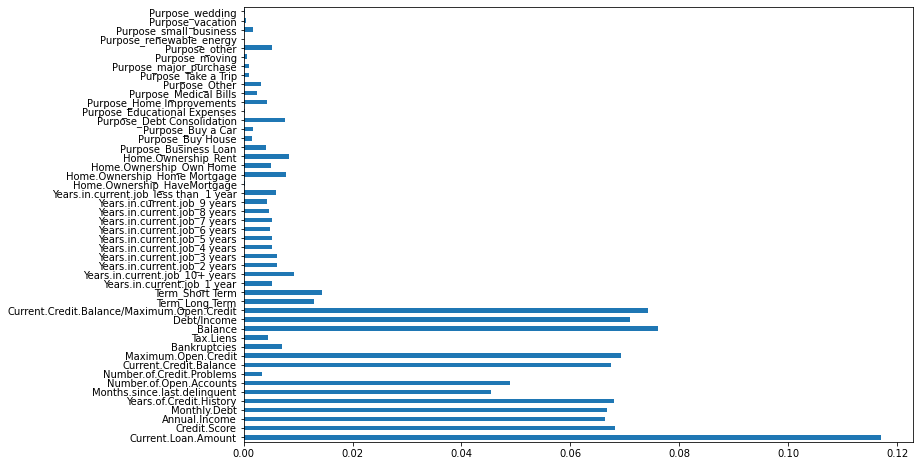

In [348]:
importances=pd.Series(model.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(12,8))

In [0]:
submission=pd.read_csv("SubmissionSample.csv")
submission['Loan.Status']=pred_test 
submission['Loan.ID']=original_test['Loan.ID']

In [0]:
pd.DataFrame(submission, columns=['Loan.ID','Loan.Status']).to_csv('asddkfoldhjlogisticratio5.csv')

XGB

In [0]:
from xgboost import XGBClassifier

In [350]:
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):
  xtr,xvl = X.loc[train_index],X.loc[test_index]     
  ytr,yvl = y[train_index],y[test_index]         
  model = XGBClassifier(n_estimators=50, max_depth=19,random_state=1)     
  model.fit(xtr, ytr)   
  pred_test = model.predict(xvl)    
  rocscore=roc_auc_score(yvl,pred_test) 
  print("rocscore",rocscore)
  score = accuracy_score(yvl,pred_test)     
  print('accuracy_score',score)

rocscore 0.5397384260030428
accuracy_score 0.7522407696735466
rocscore 0.5418638512250465
accuracy_score 0.7540498314283365
rocscore 0.5429209744107968
accuracy_score 0.7561878135021791
rocscore 0.5410568615267558
accuracy_score 0.7566811939807582
rocscore 0.5421373537128816
accuracy_score 0.7532072368421052


In [0]:
pred_test3 = model.predict(test)

In [0]:
import statistics 

In [0]:
final_pred = np.array([])

for i in range(0, len(test)):

    final_pred = np.append(final_pred, statistics.mode([pred_test1[i], pred_test2[i], pred_test3[i]]))

In [355]:
final_pred.shape

(23386,)

In [0]:
submission=pd.read_csv("SubmissionSample.csv")
submission['Loan.Status']=final_pred
submission['Loan.ID']=original_test['Loan.ID']

In [0]:
pd.DataFrame(submission, columns=['Loan.ID','Loan.Status']).to_csv('ensemblelrx.csv')